<a id="introduction"></a>  
# Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

<img src= "https://health.clevelandclinic.org/wp-content/uploads/sites/3/2018/08/GettyImages-944106494.jpg" width="1100">

## Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

We will be predicting 'HeartDisease' using various Machine Learning algorithms first which will be optimized too. After that, we will make a neural network for the predictions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="dataframe"></a>
# Accessing the Dataframe

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values.')

Age has 50 unique values.
Sex has 2 unique values.
ChestPainType has 4 unique values.
RestingBP has 67 unique values.
Cholesterol has 222 unique values.
FastingBS has 2 unique values.
RestingECG has 3 unique values.
MaxHR has 119 unique values.
ExerciseAngina has 2 unique values.
Oldpeak has 53 unique values.
ST_Slope has 3 unique values.
HeartDisease has 2 unique values.


In [6]:
df.duplicated().sum()

0

In [7]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [8]:
for col in cat_cols:
    print(f'The unique values in {col} are: {df[col].unique()}')

The unique values in Sex are: ['M' 'F']
The unique values in ChestPainType are: ['ATA' 'NAP' 'ASY' 'TA']
The unique values in FastingBS are: [0 1]
The unique values in RestingECG are: ['Normal' 'ST' 'LVH']
The unique values in ExerciseAngina are: ['N' 'Y']
The unique values in ST_Slope are: ['Up' 'Flat' 'Down']


<a id="missing-values"></a>  
# Checking for Missing Values

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Great! We don't have to deal with null values. We have separated the categorical and numerical columns and so we can now begin EDA.  
<a id="eda"></a>  
# EDA

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_9480\1844770351.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'spearman')


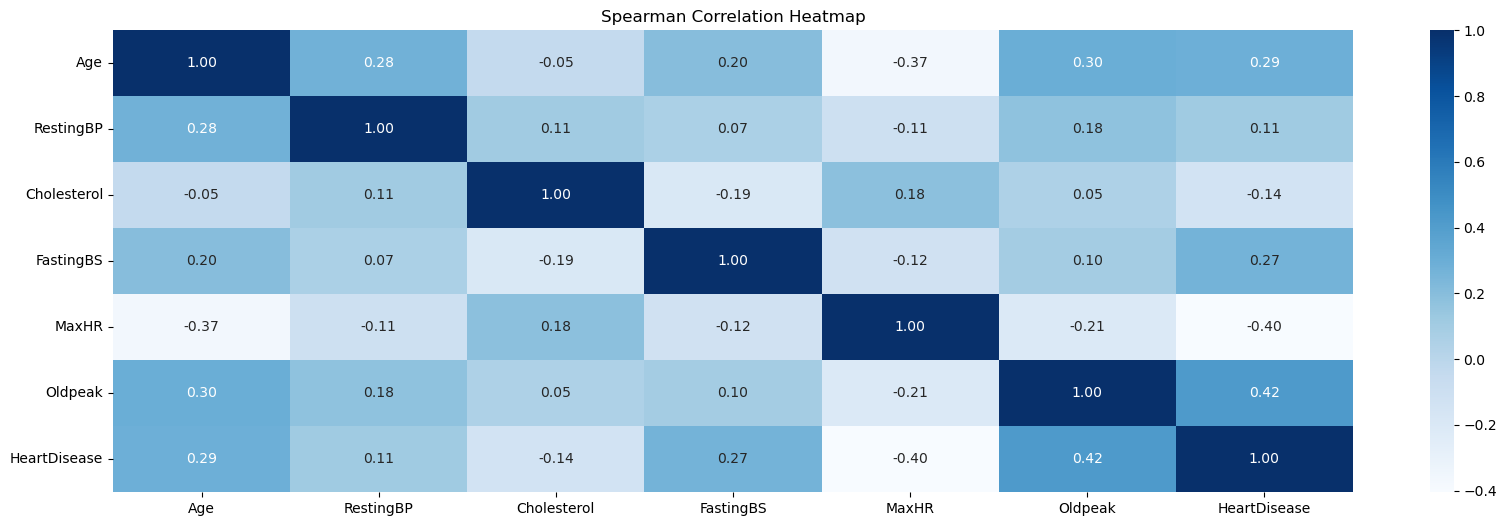

In [10]:
corr = df.corr(method = 'spearman')
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Spearman Correlation Heatmap')
plt.show()

<Figure size 2000x1000 with 0 Axes>

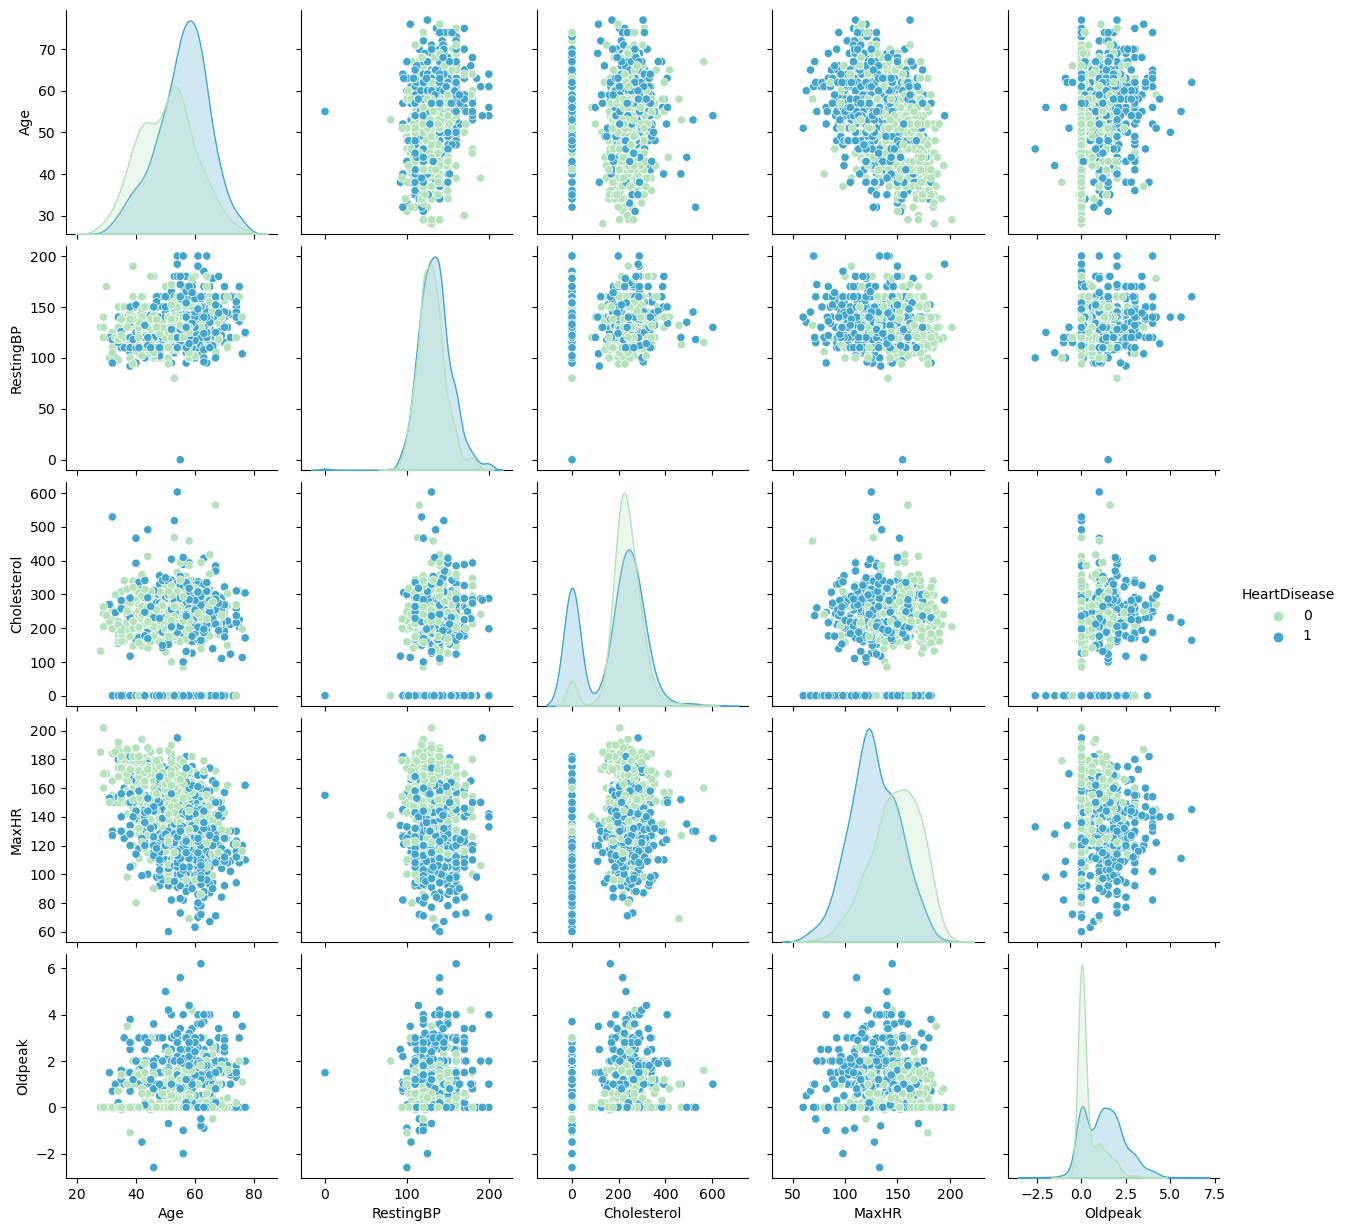

In [11]:
pairplot_cols = num_cols
pairplot_cols.append('HeartDisease')
figure = plt.figure(figsize=(20,10))
sns.pairplot(df[pairplot_cols], hue='HeartDisease', palette='GnBu')
plt.show()

Something that I noticed in the cholesterol column is that there are a lot of entries with value as 0. Let's see how many such entries are there.

In [12]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'].count()

172

In [13]:
df.loc[(df['Cholesterol'] == 0) & (df['HeartDisease'] == 1), 'Cholesterol'].count()

152

There are 172 values with cholesterol value 0 and I think this has been done to fill the missing data. Out of 172 values, 152 have heart disease. Let's just remove this column because these 172 values are basically missing values imputed with 0. We will remove it later using column transformer.

In [14]:
num_cols.remove('Cholesterol')

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_9480\2857955908.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_9480\2857955908.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_9480\2857955908.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df, palette='GnBu', jitter=True)
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_9480\2857955908.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df, palette='GnBu', jitter=True)


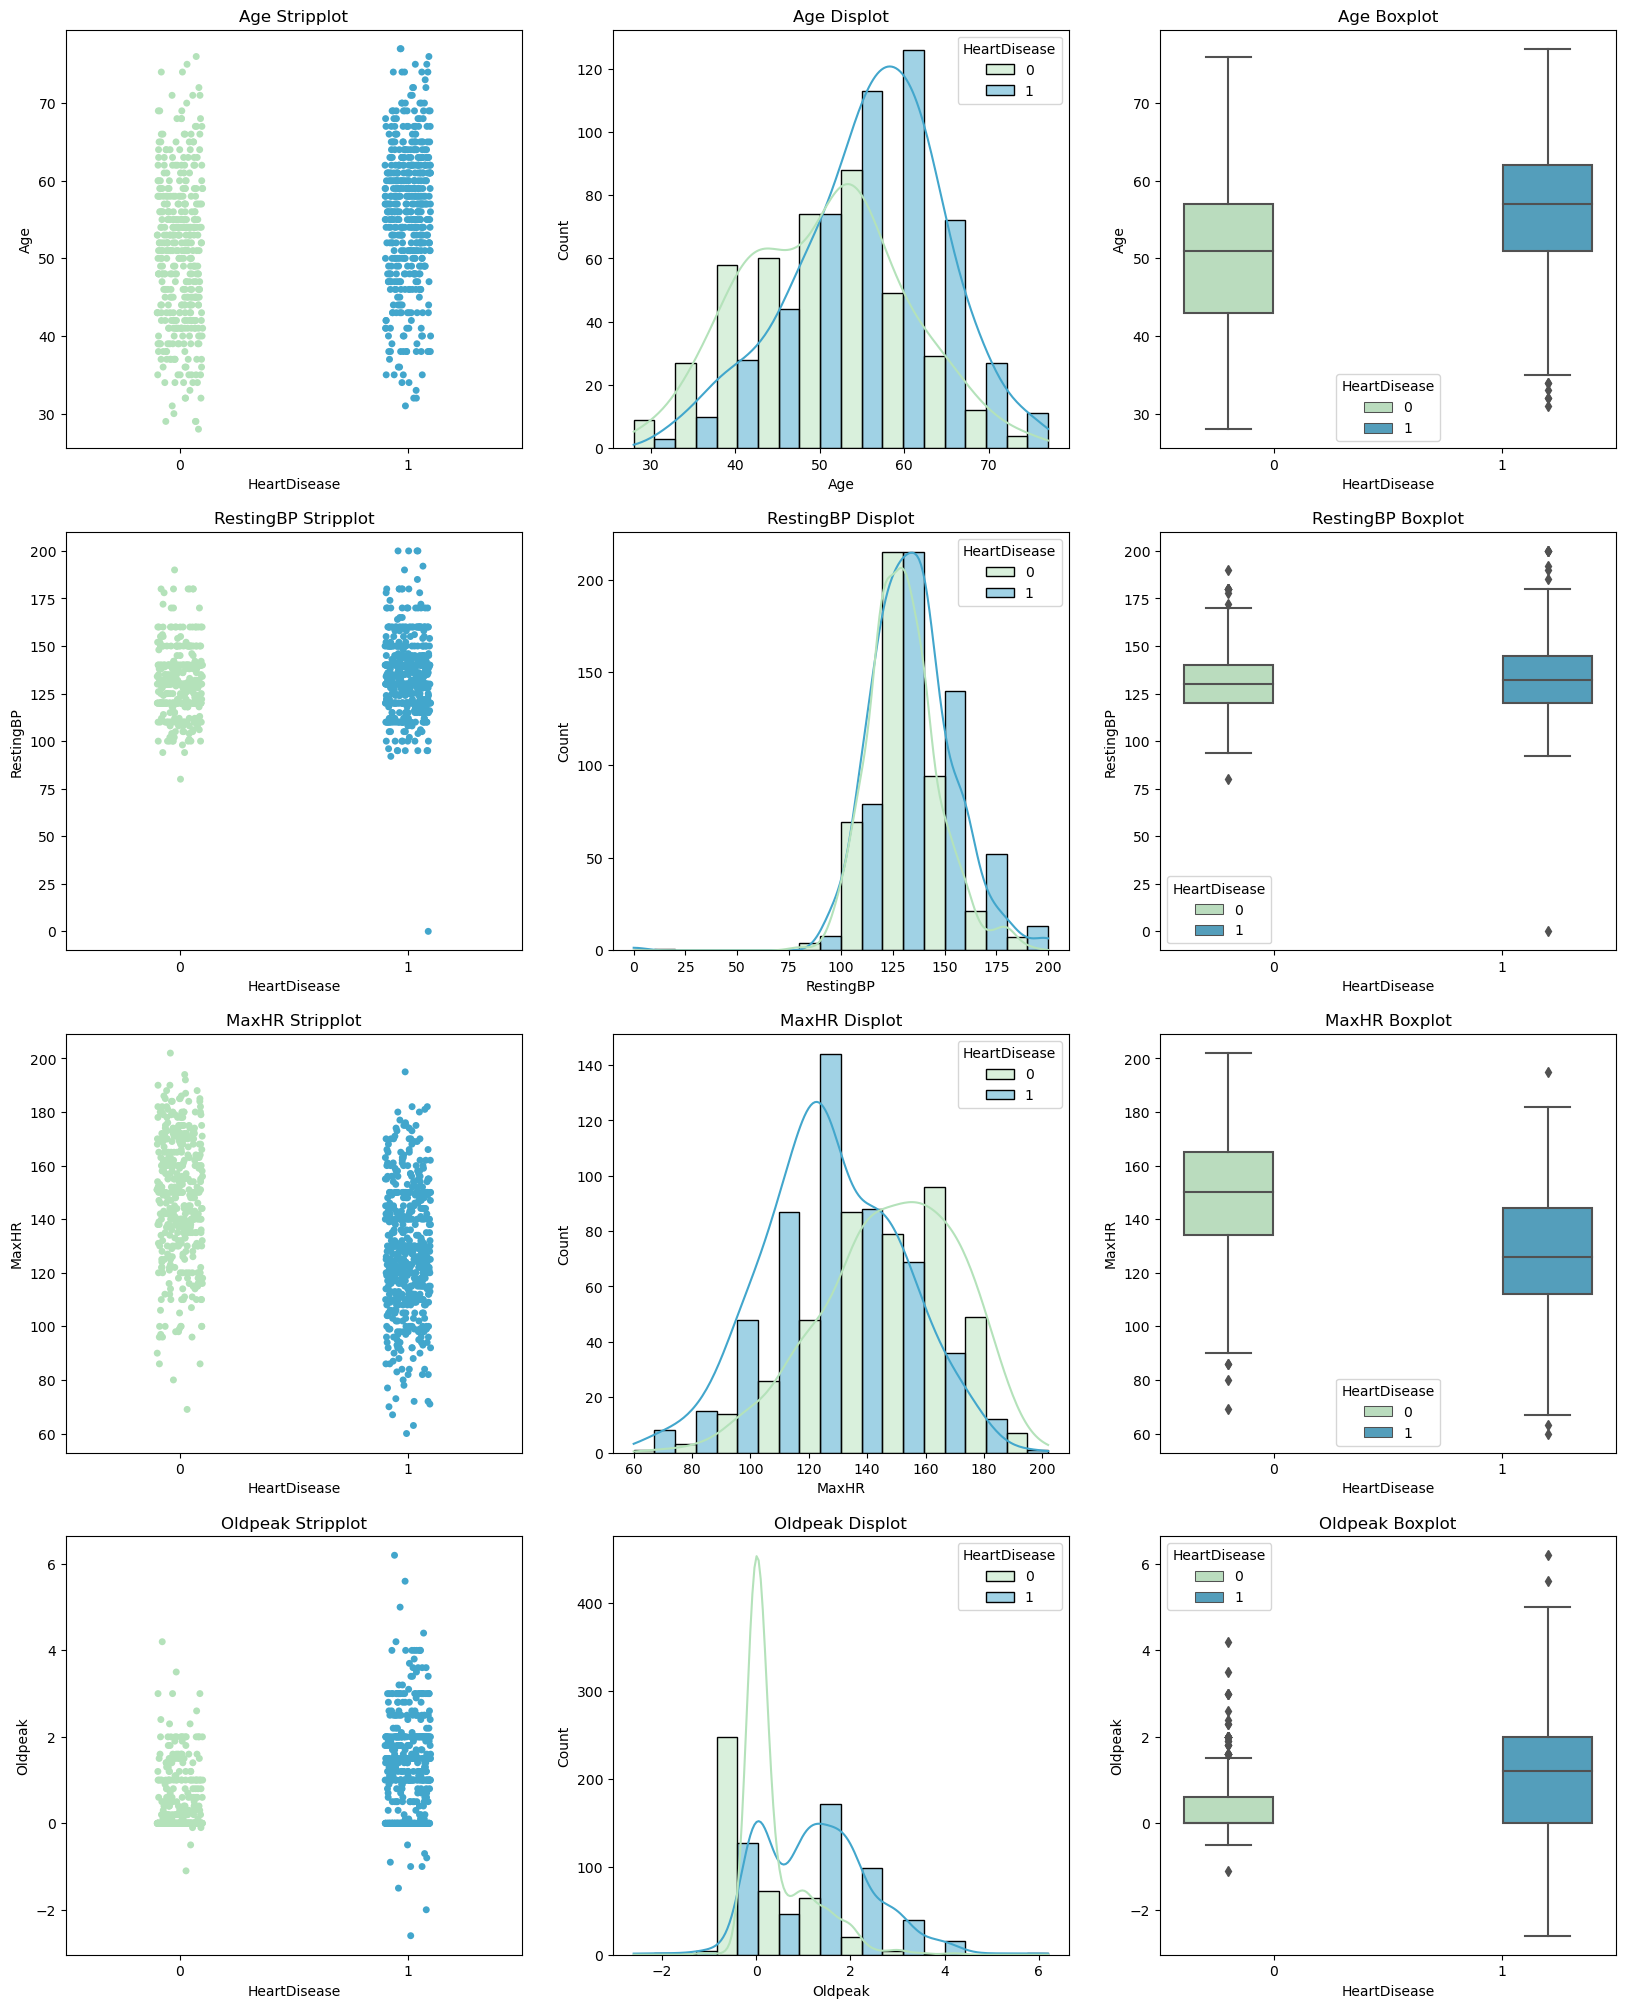

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20,25))
for i, col in zip(range(4), num_cols):
    sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=df, kde=True, bins=10, palette='GnBu', hue='HeartDisease', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='HeartDisease', y=col, data=df, palette='GnBu', hue='HeartDisease')
    axes[i][2].set_title(f'{col} Boxplot')

There are some outliers in the numerical columns. Let's replace them with the threshold values using interquantile range.

<a id="outliers"></a>  
## Replacing Outliers

In [16]:
def outlier_limits(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_limits(df, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_limits(df, variable, q1 = q1, q3 = q3)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit
    
for variable in df[num_cols].columns:
    replace_with_limits(df, variable)

<a id="eda-continued"></a>  
## EDA (Continued)

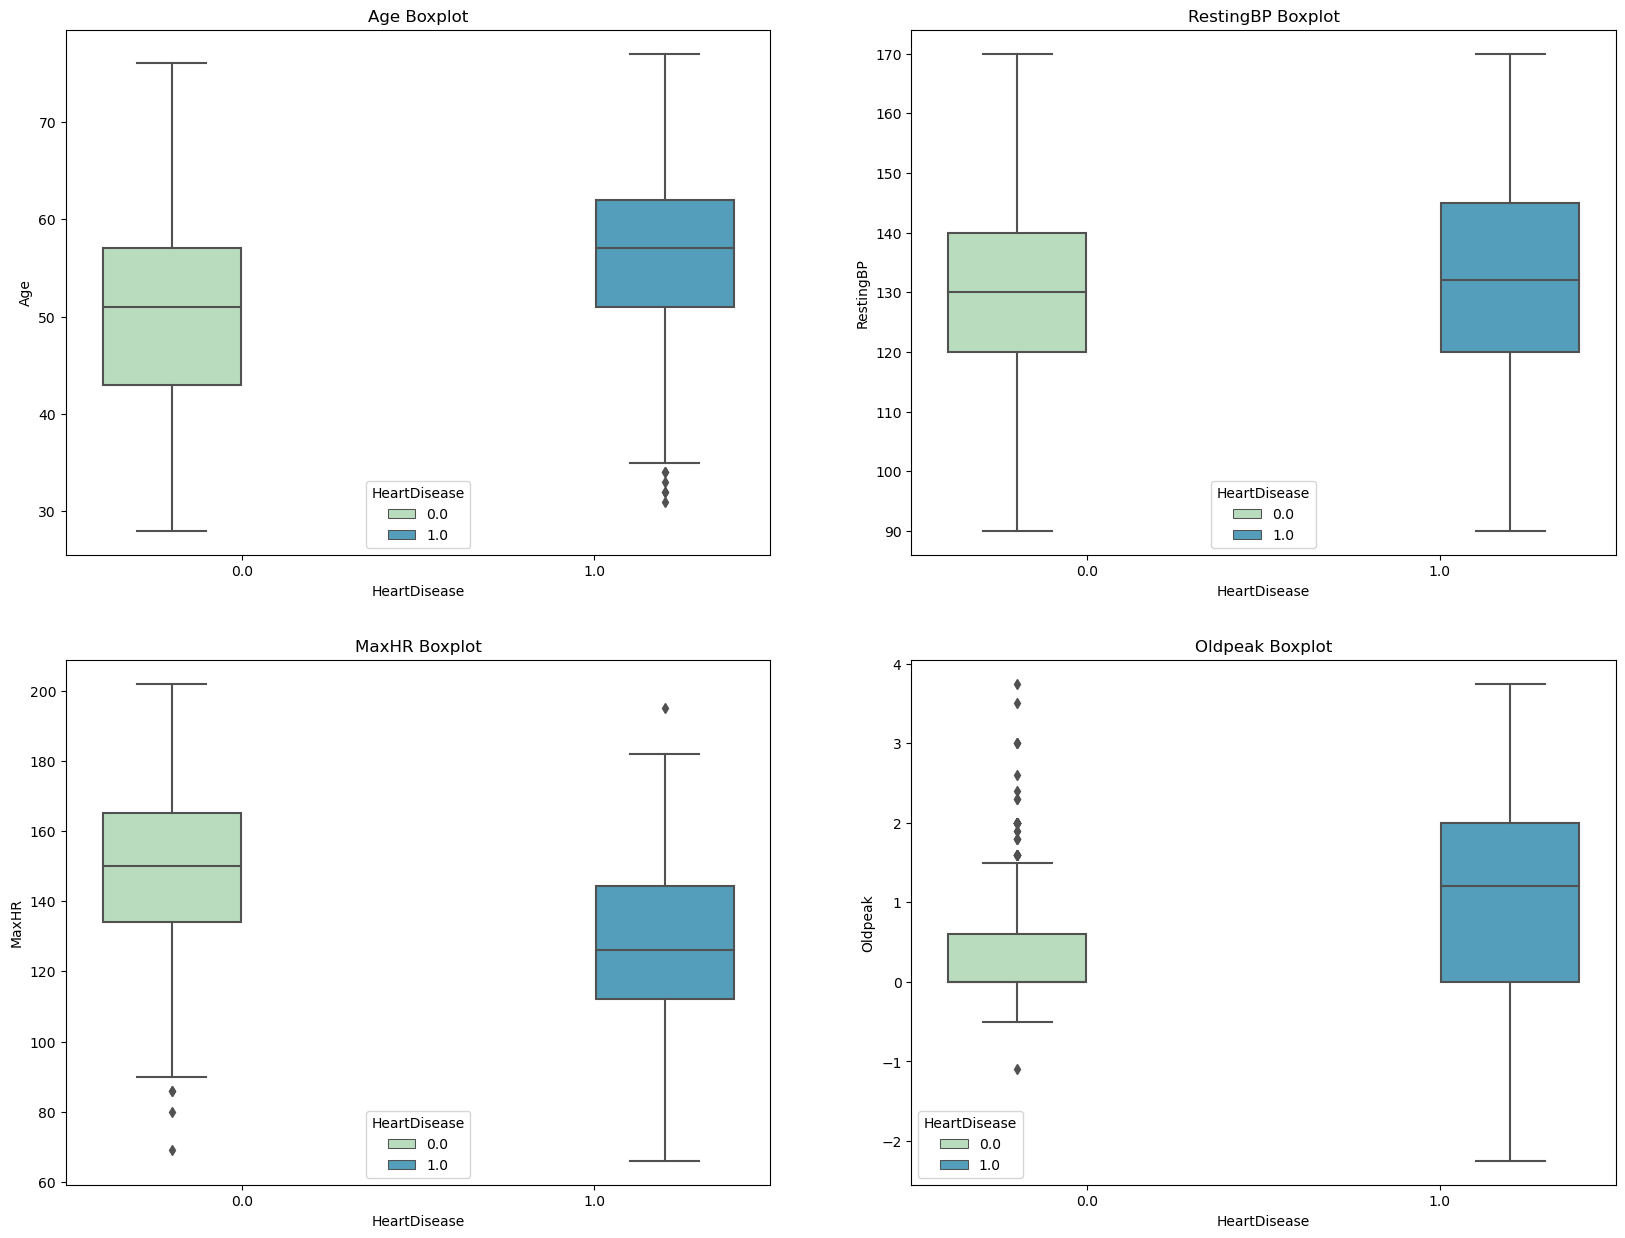

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
for i, col in zip(range(4), num_cols):
    sns.boxplot(ax=axes[i//2][i%2], x='HeartDisease', y=col, data=df, palette='GnBu', hue='HeartDisease')
    axes[i//2][i%2].set_title(f'{col} Boxplot')

Oldpeak still has a lot of outliers. We will look into it later when checking multicollinearity.

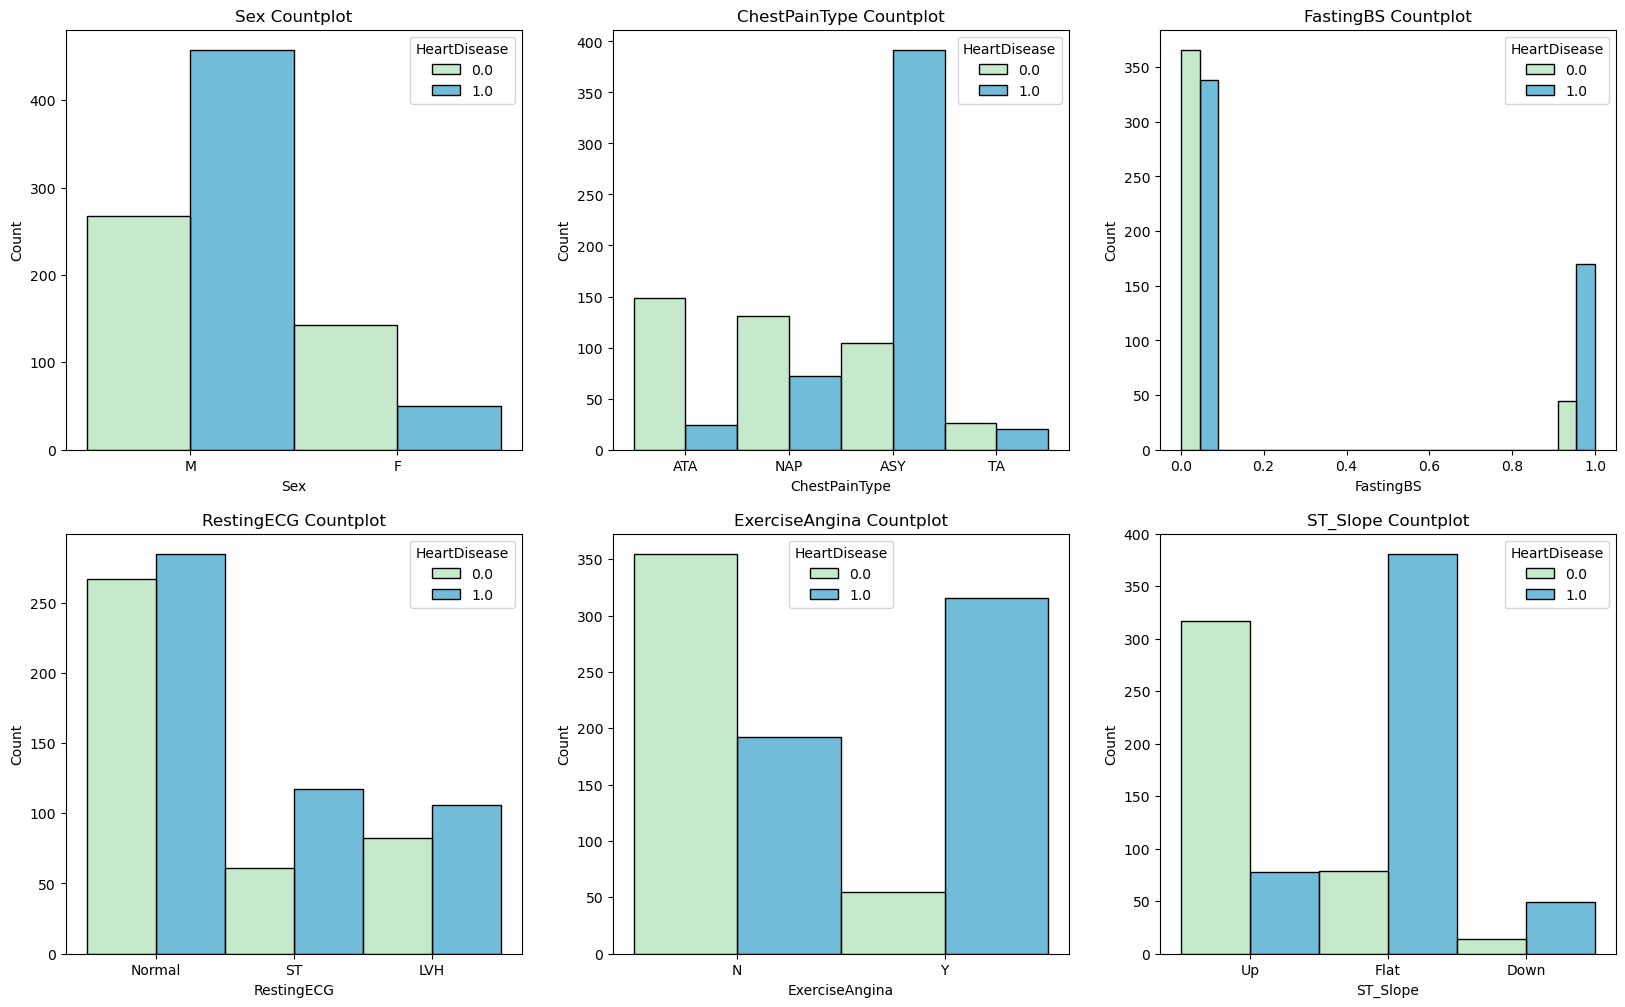

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20,12))
for i, col in zip(range(6), cat_cols):
    sns.histplot(ax=axes[i//3][i%3], x=col, data=df, palette='GnBu', hue='HeartDisease', multiple='dodge', bins='auto')
    axes[i//3][i%3].set_title(f'{col} Countplot')

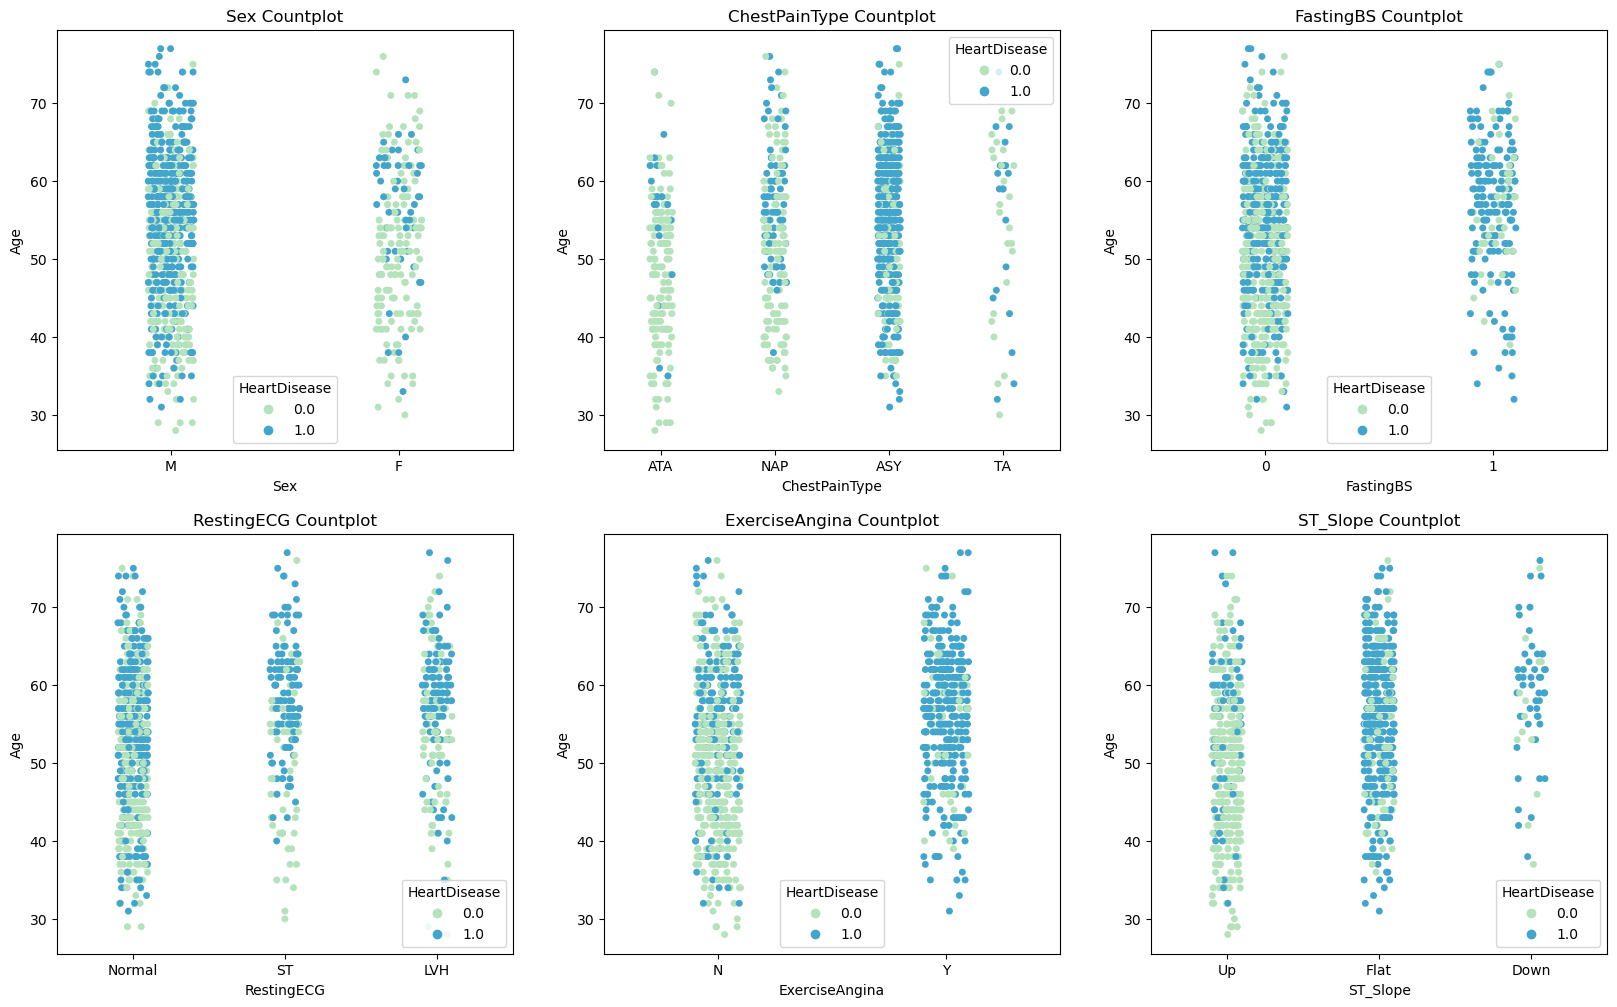

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(20,12))
for i, col in zip(range(6), cat_cols):
    sns.stripplot(ax=axes[i//3][i%3], x=col, y='Age', data=df, palette='GnBu', hue='HeartDisease', jitter=True)
    axes[i//3][i%3].set_title(f'{col} Countplot')

Let's now do some EDA for more than one feature, keeping the hue same as our target column.

In [20]:
eda_num_cols = ['RestingBP', 'MaxHR', 'Oldpeak']

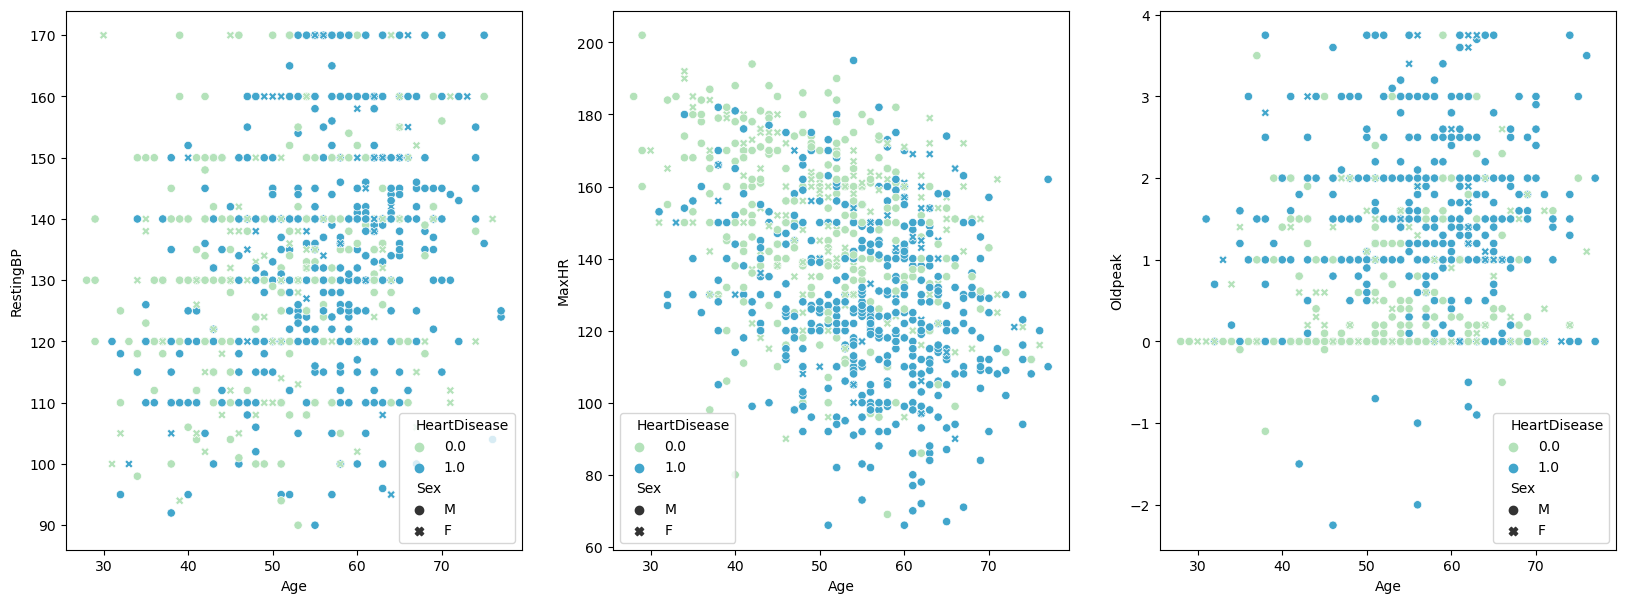

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
for i, col in zip(range(3), eda_num_cols):
    sns.scatterplot(ax=axes[i], x='Age', y=col, hue="HeartDisease", style="Sex", data=df.iloc[0:889,:], palette="GnBu")

All features seem to be useful ahead as you can see that some categorical variables have certain values that have a lot of people with heart disease. The features aren't correlated which is good. With this, we are done with our EDA.

<a id="preprocessing"></a>  
# Data Preprocessing

In [22]:
num_cols.remove('HeartDisease')

In [23]:
print(cat_cols)
print(num_cols)

['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'MaxHR', 'Oldpeak']


We want to apply different types of encoding techniques for different variables. Let's use column transformer to achieve this.

In [24]:
X = df.iloc[:,:11]
y = df['HeartDisease']
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [25]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
preprocessor1 = ColumnTransformer(
    transformers = [
        ('onehotcat', OneHotEncoder(), ['ChestPainType', 'ST_Slope', 'RestingECG', 'Sex', 'ExerciseAngina']),
        ('num', MinMaxScaler(), num_cols),
    ],
    remainder = 'passthrough',
)
preprocessor2 = ColumnTransformer(
    transformers = [
        ('pca', pca, num_cols),
        ('dropper', 'drop', ['x0_ASY', 'x1_Down', 'x2_LVH', 'x3_F', 'x4_N', 'Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'Cholesterol'])
    ],
    remainder = 'passthrough',
)

In [26]:
preprocessor1_features = ['x0_ASY', 'x0_ATA', 'x0_NAP', 'x0_TA', 'x1_Down', 'x1_Flat', 'x1_Up', 'x2_LVH', 'x2_Normal', 'x2_ST', 'x3_F', 'x3_M', 'x4_N', 'x4_Y', 'Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'Cholesterol', 'FastingBS']
final_features = ['PC-1', 'PC-2', 'x0_ATA', 'x0_NAP', 'x0_TA', 'x1_Flat', 'x1_Up', 'x2_Normal', 'x2_ST', 'x3_M', 'x4_Y', 'FastingBS']

When using column transformer, the items in array will be in the order in which they get encoded. So the OHE variables come first, followed by scaled variables and then the variables that didn't require preprocessing.  
We will be dropping 1 feature from each feature that was OHE to avoid dummy variable trap which causes multicollinearity.

In [27]:
X = pd.DataFrame(preprocessor1.fit_transform(X), columns=preprocessor1_features)
X = pd.DataFrame(preprocessor2.fit_transform(X), columns=final_features)
X.head()

,PC-1,PC-2,x0_ATA,x0_NAP,x0_TA,x1_Flat,x1_Up,x2_Normal,x2_ST,x3_M,x4_Y,FastingBS
0,0.268472,0.314646,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,-0.094260,0.372504,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.136854,-0.067667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,-0.105074,-0.037640,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.136472,0.120718,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


You can use the code below for VIF to check whether multicollinearity between features exists or not (features with VIF>5 show multicollinearity). We will run it to see which features show multicollinearity and then go back up to the column transformer to add a PCA step.

In [28]:
import statsmodels.api as sm
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Feature', 'VIF'])
    x_var_names = X.columns
    for i in range(0, x_var_names.shape[0]):
        y = X[x_var_names[i]]
        x = X[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'VIF', axis = 0, ascending=False, inplace=False)

calculate_vif(X)

,Feature,VIF
9,x3_M,4.38
5,x1_Flat,4.10
6,x1_Up,4.06
7,x2_Normal,3.67
10,x4_Y,2.35
8,x2_ST,1.90
2,x0_ATA,1.75
3,x0_NAP,1.51
0,PC-1,1.38
11,FastingBS,1.37


The numerical columns show multicollinearity. Rather than removing the numerical columns, it is better to reduce their dimension using PCA which will also reduce VIF. Numerical features do contain important information. We can add the preprocessor2 which contains the PCA step to our pipeline.

<a id="ml"></a>  
# Machine Learning  
We will split the data first, apply different models and optimize them.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
def fit(clf, params, cv=10, X_train=X_train, y_train=y_train):
    grid = GridSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring='accuracy', refit=True) #verbose and n_jobs help us see the computation time and score of a cv. Higher the value of verbose, more the information printed out.
    grid.fit(X_train, y_train)
    return grid

def make_predictions(model, X_test=X_test):
    return model.predict(X_test)

def best_scores(model):
    # print(f'The mean cross validation test score is: {model.cv_results_.mean_test_score}') #for some reason this wasn't working for me even though the attribute exists so lets just leave it.
    print(f'The best parameters are: {model.best_params_}')
    print(f'The best score that we got is: {model.best_score_}')
    return None

def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large') 
    plt.xlabel('Predictions', fontsize=14)
    plt.ylabel('Actuals', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    return None

def check_scores(y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    print('ROC-AUC Score: %.3f' % roc_auc_score(y_test, y_pred))
    return None

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$  
Precision = $\frac{TP}{TP + FP}$  
Recall = $\frac{TP}{TP + FN}$  
F1 Score = $\frac{2 * Precision * Recall}{Precision + Recall}$

<a id="lr"></a>  
## Logistic Regression

In [32]:
lr_params = {'C':[0.001,.009,0.01,.09,1,5,10,25], 'penalty':['l1', 'l2']} #lasso and ridge regression
lr_clf = LogisticRegression(solver='saga', max_iter=5000)
lr_model = fit(lr_clf, lr_params)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


Time elapsed: 1.4s

In [33]:
best_scores(lr_model)

The best parameters are: {'C': 0.09, 'penalty': 'l2'}
The best score that we got is: 0.8554609403924471


In [34]:
lr_y_pred = make_predictions(lr_model)
check_scores(lr_y_pred)

Precision: 0.873
Recall: 0.873
Accuracy: 0.859
F1 Score: 0.873
ROC-AUC Score: 0.857


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



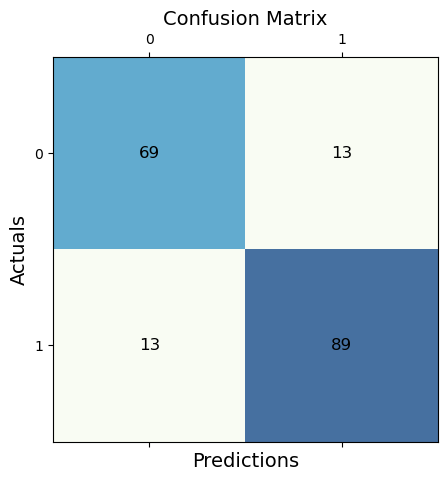

In [35]:
plot_confusion_matrix(lr_y_pred)

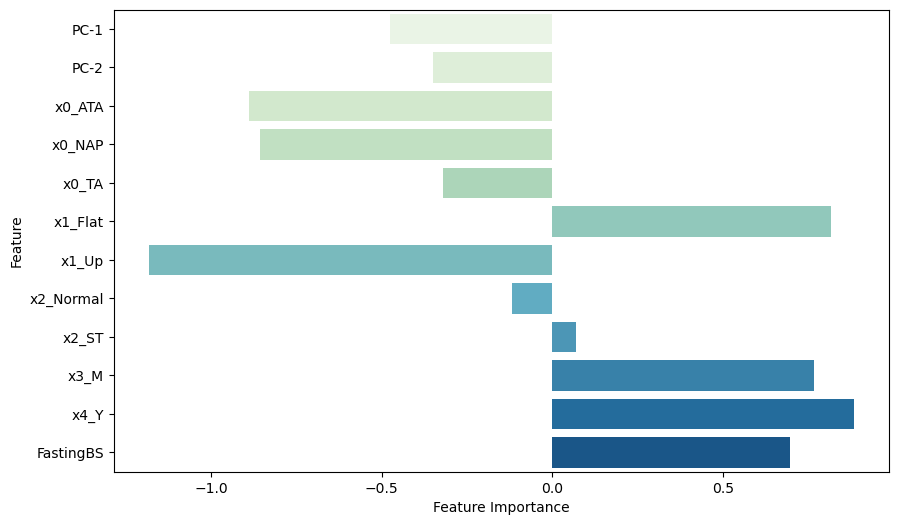

In [36]:
lr_feature_scores = lr_model.best_estimator_.coef_[0].tolist()
lr_fi = pd.DataFrame({'Feature': final_features, 'Feature Importance': lr_feature_scores})
plt.figure(figsize=(10,6))
sns.barplot(x='Feature Importance', y='Feature', data=lr_fi, palette='GnBu')
plt.show()

The best parameters are: {'C': 0.09, 'penalty': 'l2'}  
The best score that we got is: 0.855460940392447  
Precision: 0.873  
Recall: 0.873  
Accuracy: 0.859  
F1 Score: 0.873  
ROC-AUC Score: 0.857

<a id="gnb"></a>  
## Gaussian Naive Bayes

In [37]:
gnb_params = {'priors': [None], 'var_smoothing': np.logspace(0,-9, num=100)}
gnb_clf = GaussianNB()
gnb_model = fit(gnb_clf, gnb_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [39]:
best_scores(gnb_model)

The best parameters are: {'priors': None, 'var_smoothing': 0.08111308307896872}
The best score that we got is: 0.8554794520547946


In [40]:
gnb_y_pred = make_predictions(gnb_model)
check_scores(gnb_y_pred)

Precision: 0.898
Recall: 0.863
Accuracy: 0.870
F1 Score: 0.880
ROC-AUC Score: 0.870


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



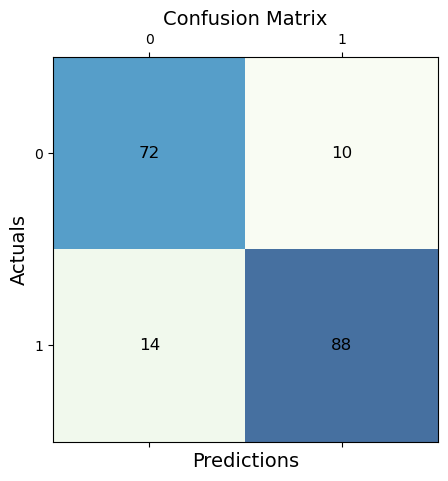

In [41]:
plot_confusion_matrix(gnb_y_pred)

The best parameters are: {'priors': None, 'var_smoothing': 0.08111308307896872}  
The best score that we got is: 0.8554794520547946   
Precision: 0.898  
Recall: 0.863  
Accuracy: 0.870  
F1 Score: 0.880  
ROC-AUC Score: 0.870

<a id="knn"></a>  
## K-NNs

In [42]:
knns_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'], 
               'metric': ['euclidean', 'manhattan']}
knns_clf = KNeighborsClassifier()
knns_model = fit(knns_clf, knns_params)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [43]:
best_scores(knns_model)

The best parameters are: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
The best score that we got is: 0.8541651240281377


In [44]:
knns_y_pred = make_predictions(knns_model)
check_scores(knns_y_pred)

Precision: 0.877
Recall: 0.912
Accuracy: 0.880
F1 Score: 0.894
ROC-AUC Score: 0.877


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



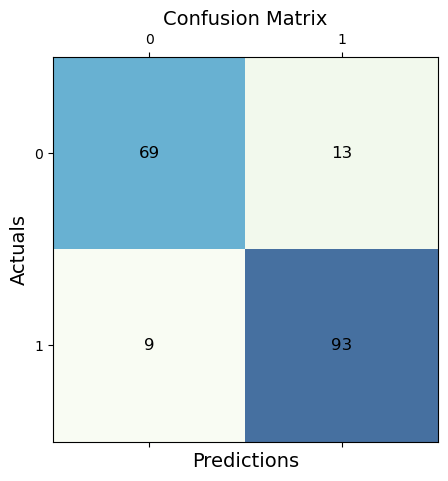

In [45]:
plot_confusion_matrix(knns_y_pred)

The best parameters are: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}  
The best score that we got is: 0.8541651240281377     
Precision: 0.877  
Recall: 0.912  
Accuracy: 0.880  
F1 Score: 0.894  
ROC-AUC Score: 0.877

<a id="svm"></a>  
## SVMs

In [46]:
svm_params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svm_clf = SVC()
svm_model = fit(svm_clf, svm_params)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [47]:
best_scores(svm_model)

The best parameters are: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
The best score that we got is: 0.8567937800814512


In [48]:
svm_y_pred = make_predictions(svm_model)
check_scores(svm_y_pred)

Precision: 0.847
Recall: 0.922
Accuracy: 0.864
F1 Score: 0.883
ROC-AUC Score: 0.857


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



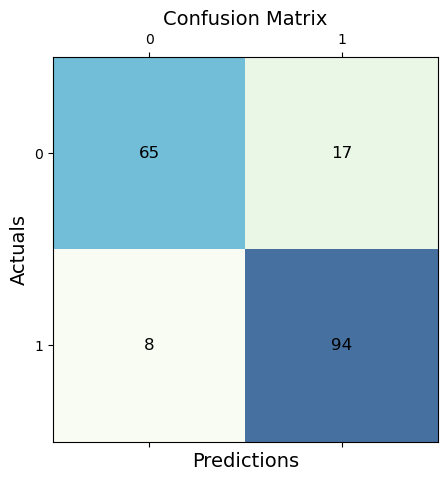

In [49]:
plot_confusion_matrix(svm_y_pred)

The best parameters are: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}  
The best score that we got is: 0.8567937800814512    
Precision: 0.847  
Recall: 0.922  
Accuracy: 0.864  
F1 Score: 0.883  
ROC-AUC Score: 0.857

<a id="dt"></a>  
## Decision Trees

In [50]:
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 
             'min_samples_leaf': range(1,5)}
dt_clf = DecisionTreeClassifier()
dt_model = fit(dt_clf, dt_params)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


Time elapsed: 4.7s

In [51]:
best_scores(dt_model)

The best parameters are: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
The best score that we got is: 0.8349870418363569


In [52]:
dt_y_pred = make_predictions(dt_model)
check_scores(dt_y_pred)

Precision: 0.850
Recall: 0.833
Accuracy: 0.826
F1 Score: 0.842
ROC-AUC Score: 0.825


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



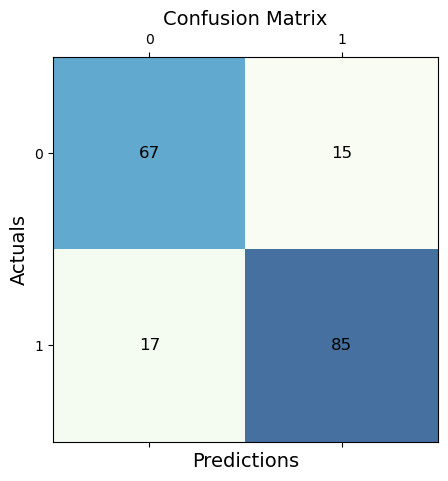

In [53]:
plot_confusion_matrix(dt_y_pred)

The best parameters are: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4}  
The best score that we got is: 0.8350055534987042  
Precision: 0.843  
Recall: 0.843  
Accuracy: 0.826  
F1 Score: 0.843  
ROC-AUC Score: 0.824